<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
path = "/Users/GuangYi/Documents/GitHub/project2/sat_scores.csv"
reader = csv.DictReader(open(path, 'rb'))
dict_list = []

for line in reader:
    dict_list.append(line)

dict_list

[{'Math': '510', 'Rate': '82', 'State': 'CT', 'Verbal': '509'},
 {'Math': '513', 'Rate': '81', 'State': 'NJ', 'Verbal': '499'},
 {'Math': '515', 'Rate': '79', 'State': 'MA', 'Verbal': '511'},
 {'Math': '505', 'Rate': '77', 'State': 'NY', 'Verbal': '495'},
 {'Math': '516', 'Rate': '72', 'State': 'NH', 'Verbal': '520'},
 {'Math': '499', 'Rate': '71', 'State': 'RI', 'Verbal': '501'},
 {'Math': '499', 'Rate': '71', 'State': 'PA', 'Verbal': '500'},
 {'Math': '506', 'Rate': '69', 'State': 'VT', 'Verbal': '511'},
 {'Math': '500', 'Rate': '69', 'State': 'ME', 'Verbal': '506'},
 {'Math': '501', 'Rate': '68', 'State': 'VA', 'Verbal': '510'},
 {'Math': '499', 'Rate': '67', 'State': 'DE', 'Verbal': '501'},
 {'Math': '510', 'Rate': '65', 'State': 'MD', 'Verbal': '508'},
 {'Math': '499', 'Rate': '65', 'State': 'NC', 'Verbal': '493'},
 {'Math': '489', 'Rate': '63', 'State': 'GA', 'Verbal': '491'},
 {'Math': '501', 'Rate': '60', 'State': 'IN', 'Verbal': '499'},
 {'Math': '488', 'Rate': '57', 'State': 

In [3]:
path = "/Users/GuangYi/Documents/GitHub/project2/sat_scores.csv"
dict_items = []
with open(path, 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        dict_items.append(row)

item_list = []
holder = [0] * len(dict_items[0])

for a in range(len(dict_items[0])) :

    for b in range(1,len(dict_items)) :
        values_list = dict_items[b][a]
        item_list.append(values_list)

    holder[a] = item_list
    item_list = []

dictionary = dict(zip(dict_items[0], holder))
pprint(dictionary)

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['82',
          '81',
          '79',
          '77',
          '72',
          '71',
          '71',
   

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
sat_df = pd.DataFrame(dictionary)
sat_df

Math Rate State Verbal
0   510   82    CT    509
1   513   81    NJ    499
2   515   79    MA    511
3   505   77    NY    495
4   516   72    NH    520
5   499   71    RI    501
6   499   71    PA    500
7   506   69    VT    511
8   500   69    ME    506
9   501   68    VA    510
10  499   67    DE    501
11  510   65    MD    508
12  499   65    NC    493
13  489   63    GA    491
14  501   60    IN    499
15  488   57    SC    486
16  474   56    DC    482
17  526   55    OR    526
18  499   54    FL    498
19  527   53    WA    527
20  499   53    TX    493
21  515   52    HI    485
22  510   51    AK    514
23  517   51    CA    498
24  525   34    AZ    523
25  515   33    NV    509
26  542   31    CO    539
27  439   26    OH    534
28  539   23    MT    539
29  512   18    WV    527
30  542   17    ID    543
31  553   13    TN    562
32  542   13    NM    551
33  589   12    IL    576
34  550   12    KY    550
35  545   11    WY    547
36  572   11    MI    561
37  589    9    MN    580
38  580    9    KS    577
39  554    9    AL    559
40  568    8    NE    562
41  561    8    OK    567
42  577    8    MO    577
43  562    7    LA    564
44  596    6    WI    584
45  550    6    AR    562
46  570    5    UT    575
47  603    5    IA    593
48  582    4    SD    577
49  599    4    ND    592
50  551    4    MS    566
51  514   45   All    506

In [5]:
sat_df2 = pd.read_csv(path)
sat_df2

State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514

In [6]:
print sat_df.dtypes
print 
print sat_df2.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat_df2.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
data_dict = {}

data_dict["State"] = [sat_df2.dtypes["State"], "The variable is an object, which in Pandas notation indicates that it is a string"]
data_dict["Rate"] = [sat_df2.dtypes["Rate"], "The variable is an integer"]
data_dict["Verbal"] = [sat_df2.dtypes["Verbal"], "The variable is an integer"]
data_dict["Math"] = [sat_df2.dtypes["Math"], "The variable is an integer"]
data_dict["Shape"] = [("The shape of the SAT DataFrame is", str(sat_df2.shape))]



In [9]:
data_dict

{'Math': [dtype('int64'), 'The variable is an integer'],
 'Rate': [dtype('int64'), 'The variable is an integer'],
 'Shape': [('The shape of the SAT DataFrame is', '(52, 4)')],
 'State': [dtype('O'),
  'The variable is an object, which in Pandas notation indicates that it is a string'],
 'Verbal': [dtype('int64'), 'The variable is an integer']}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

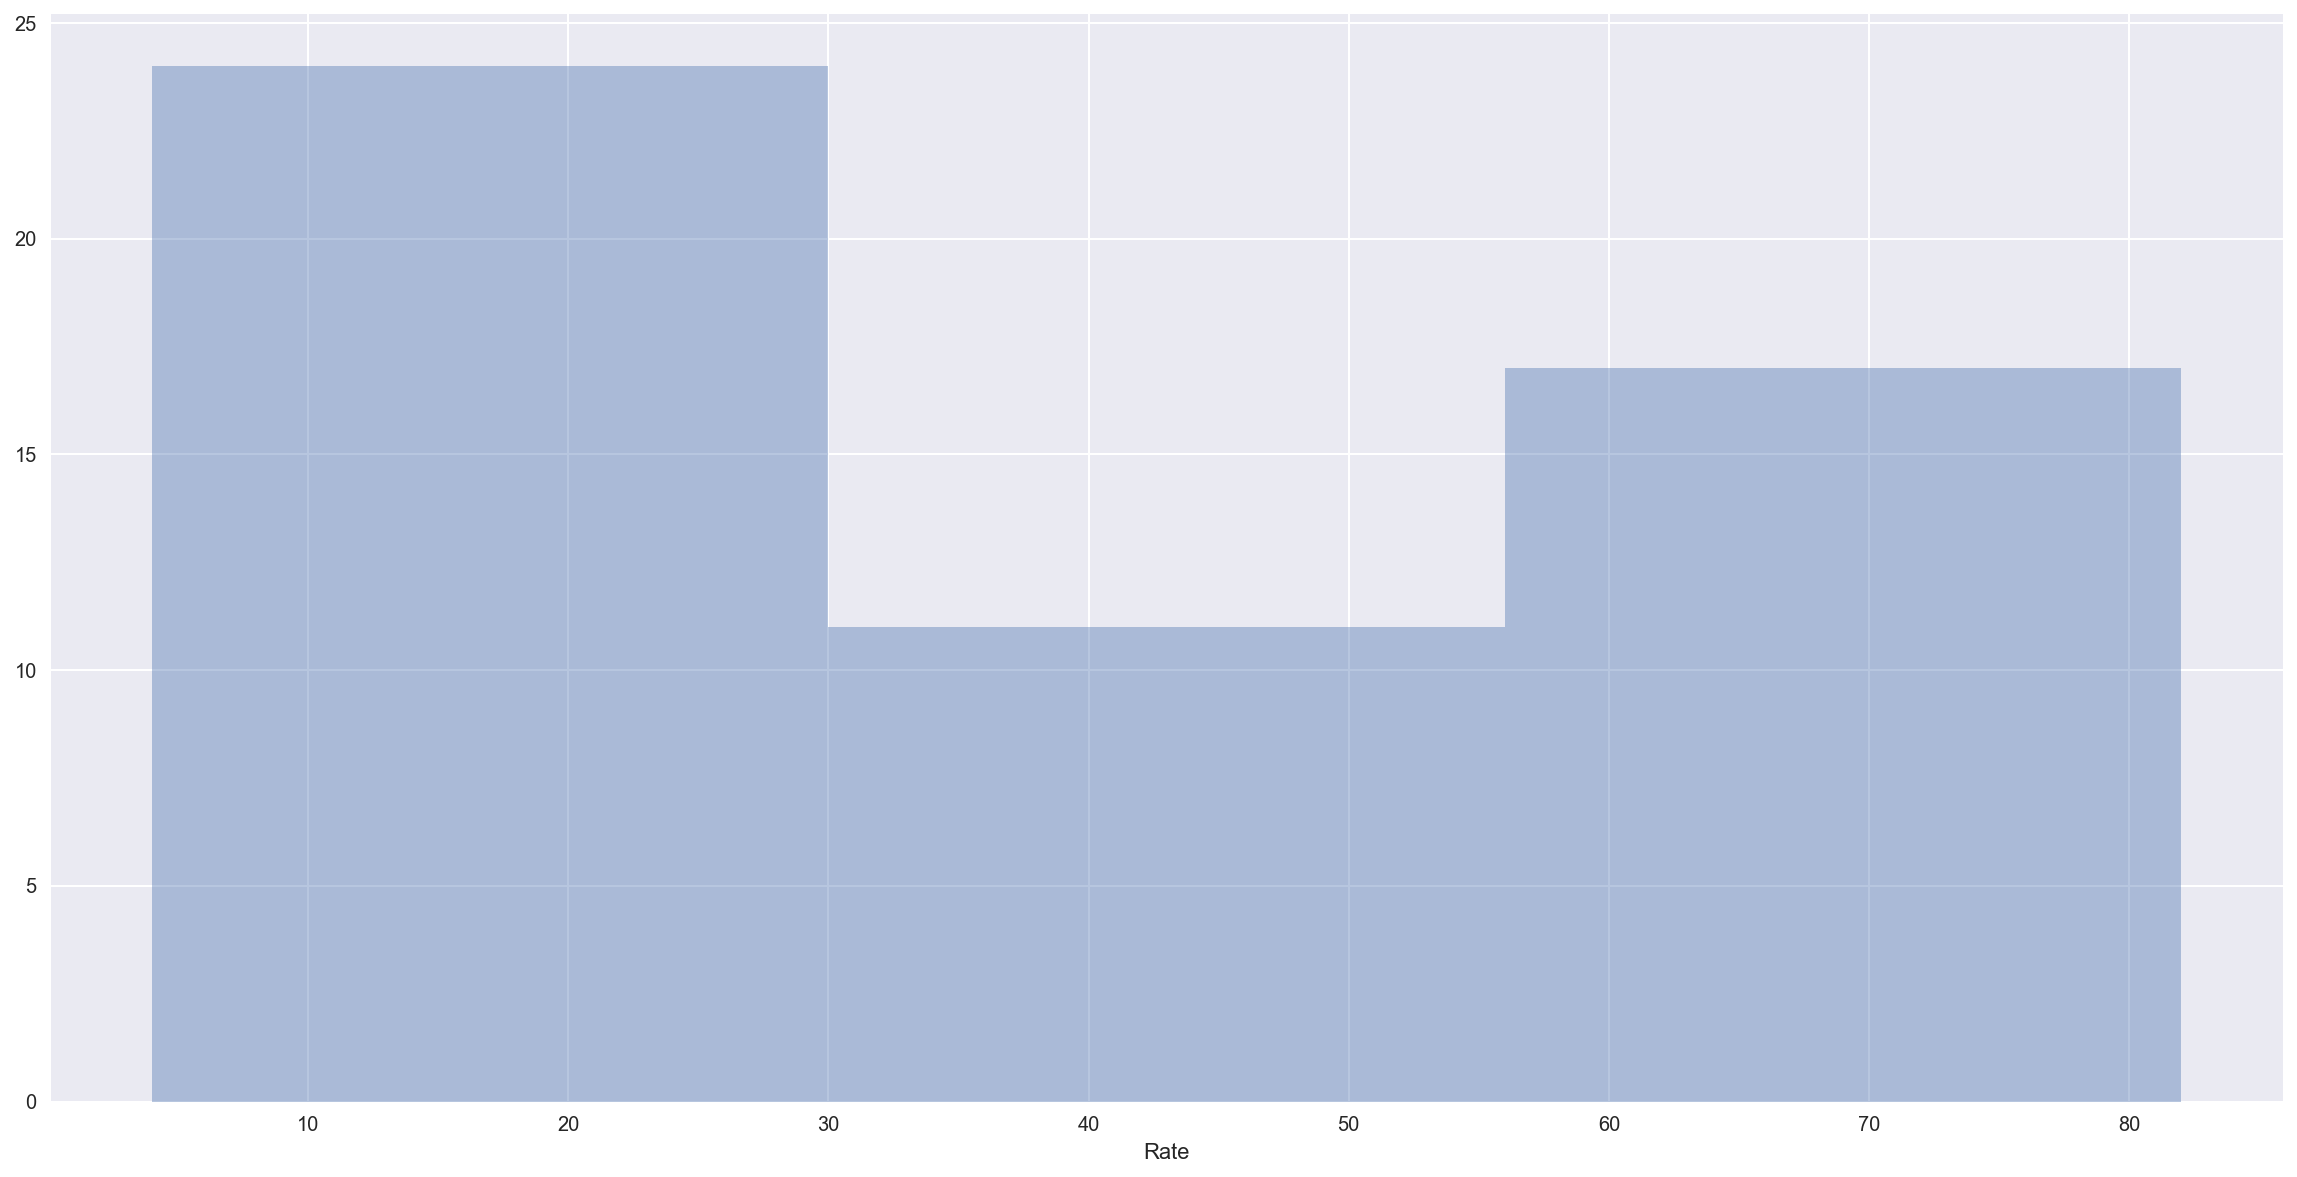

In [10]:
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(sat_df2.Rate, kde=False, hist=True)

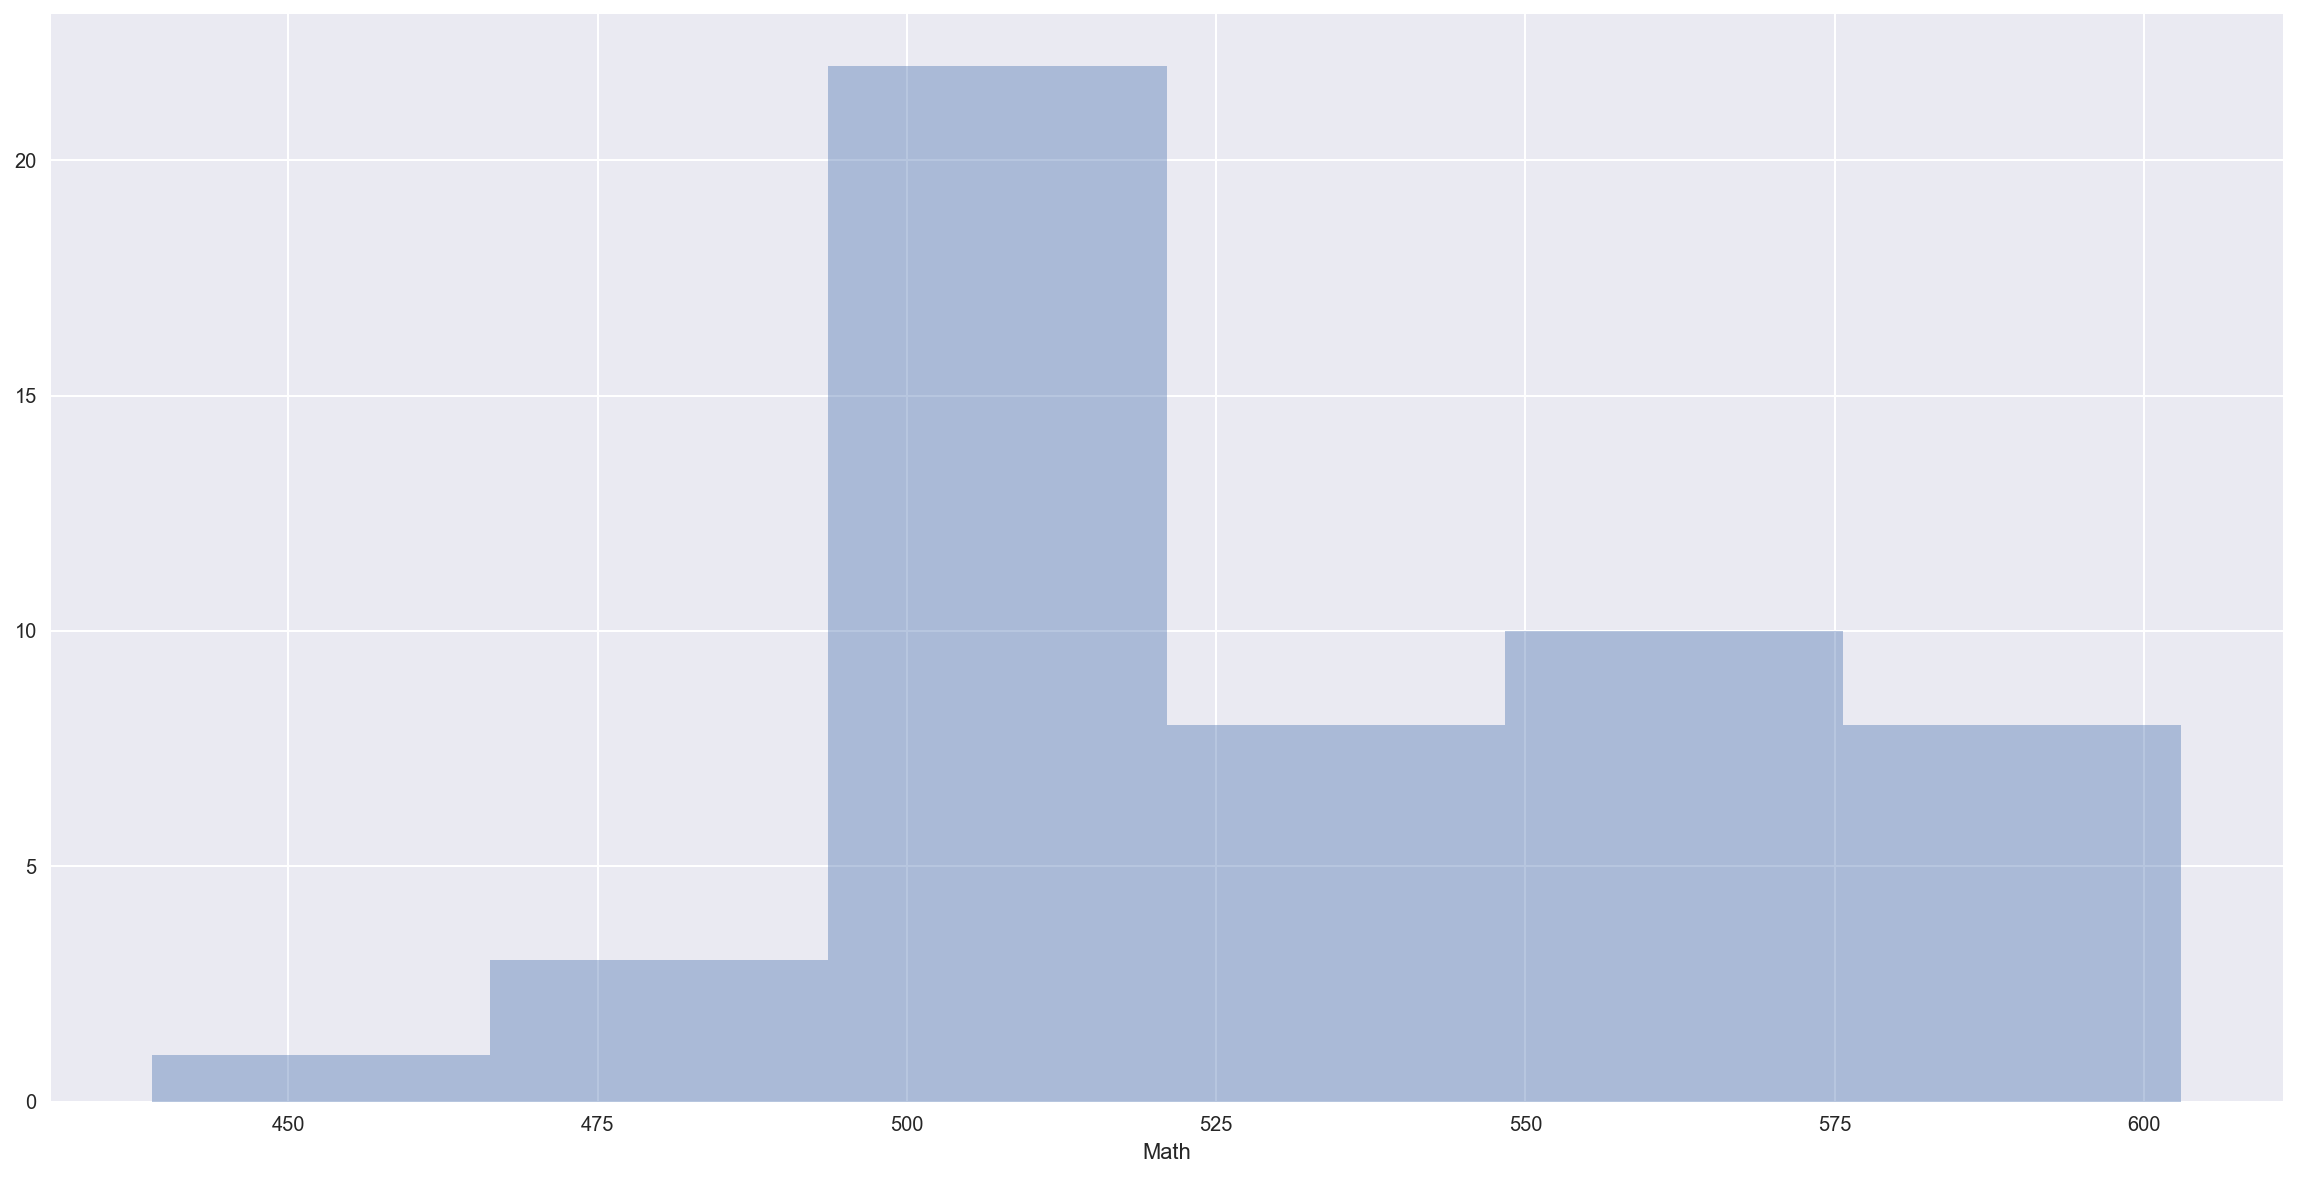

In [11]:
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(sat_df2.Math, kde=False, hist=True)

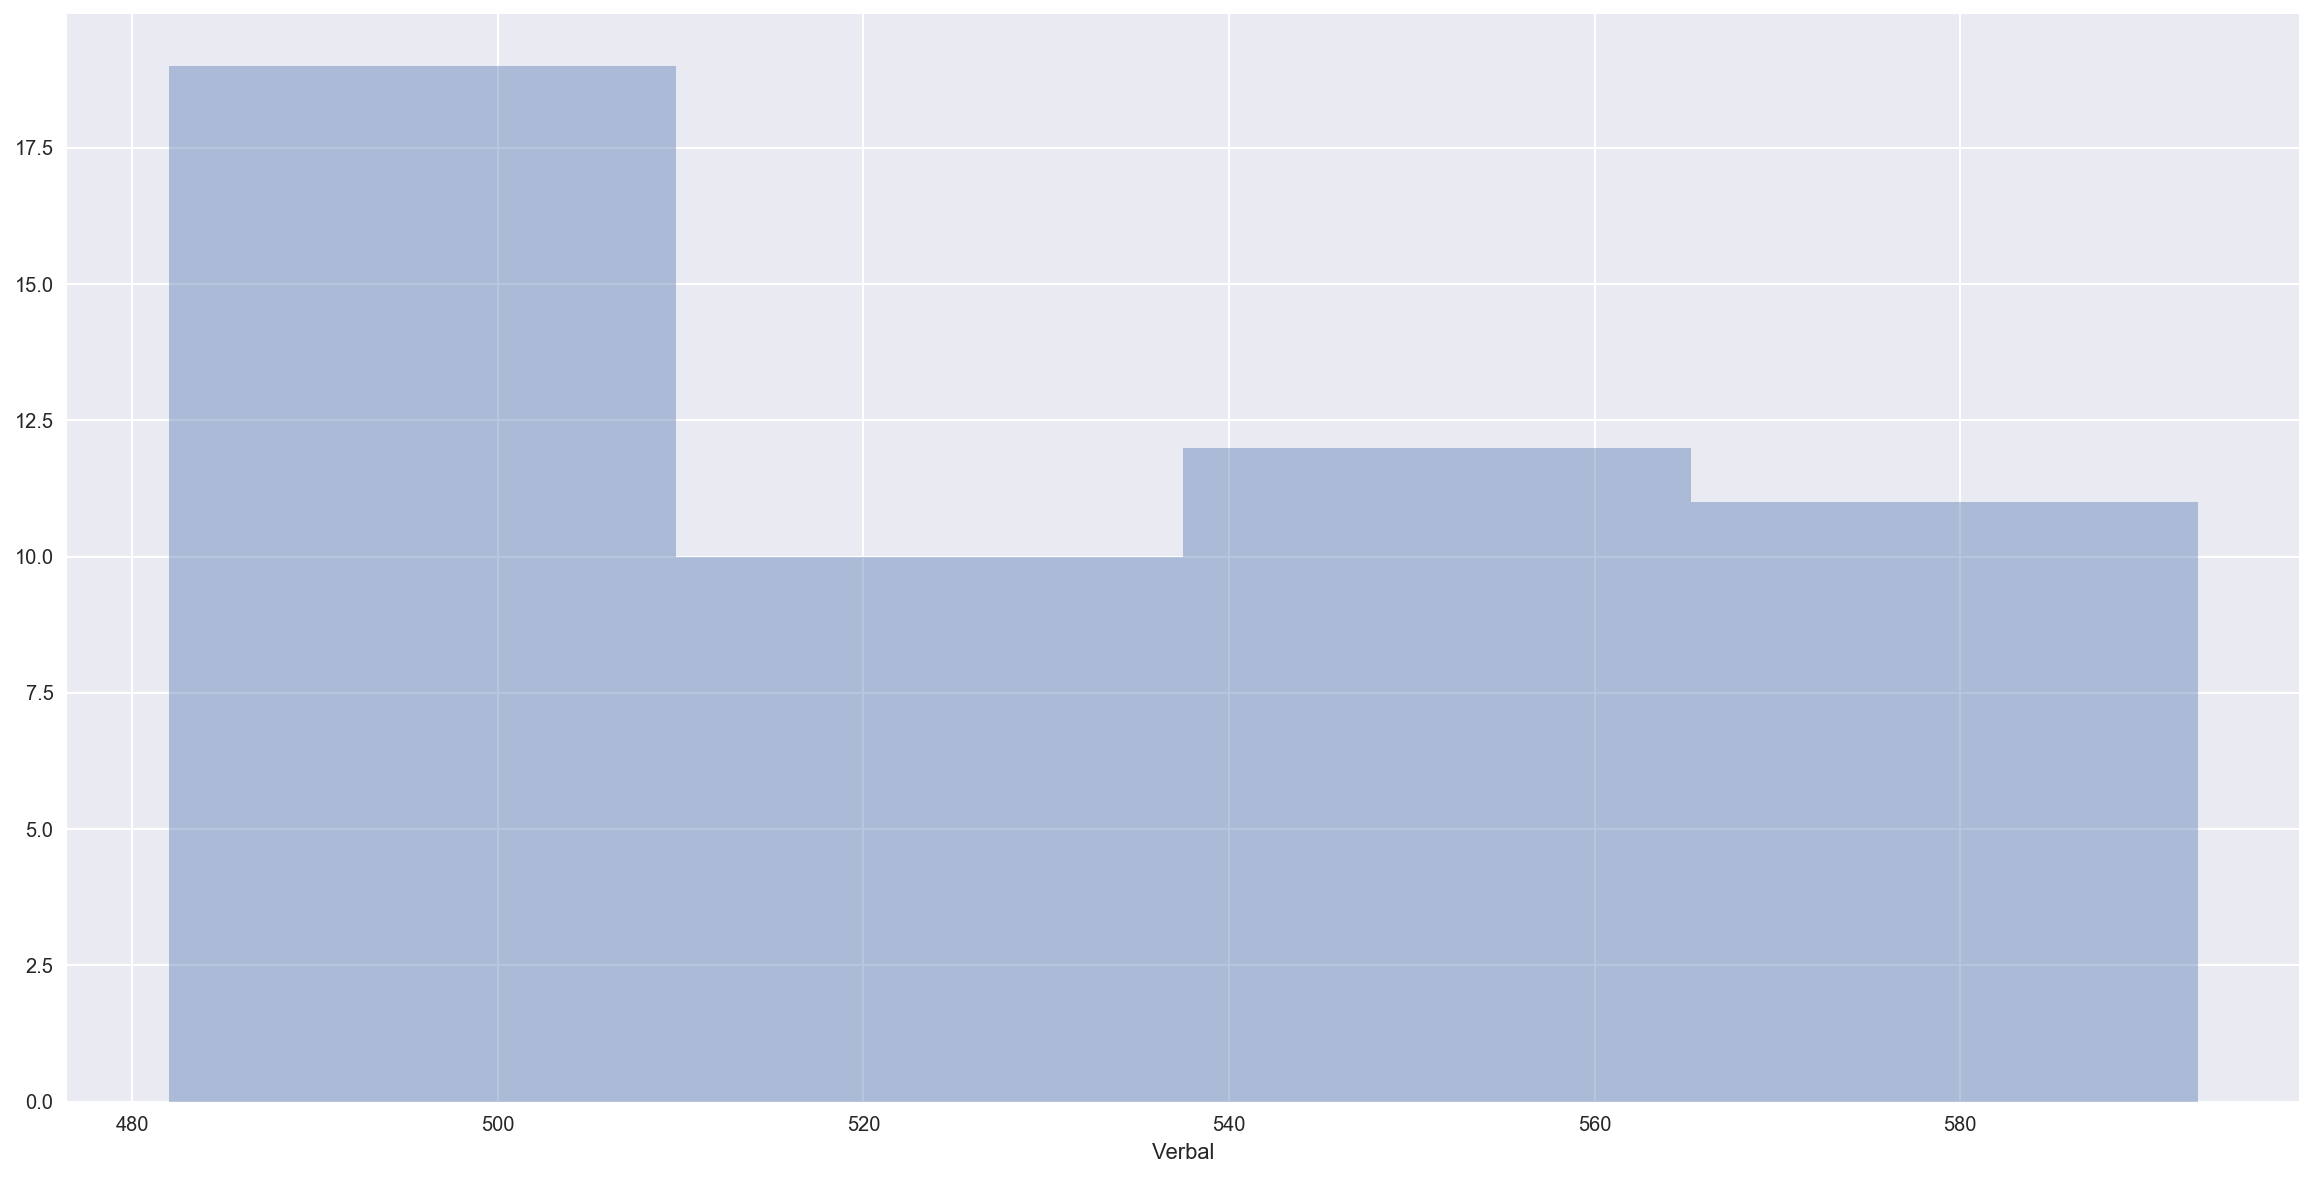

In [12]:
sns.set()
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(sat_df2.Verbal, kde=False, hist=True)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [13]:
sat_df2.drop(51, axis=0, inplace=True)

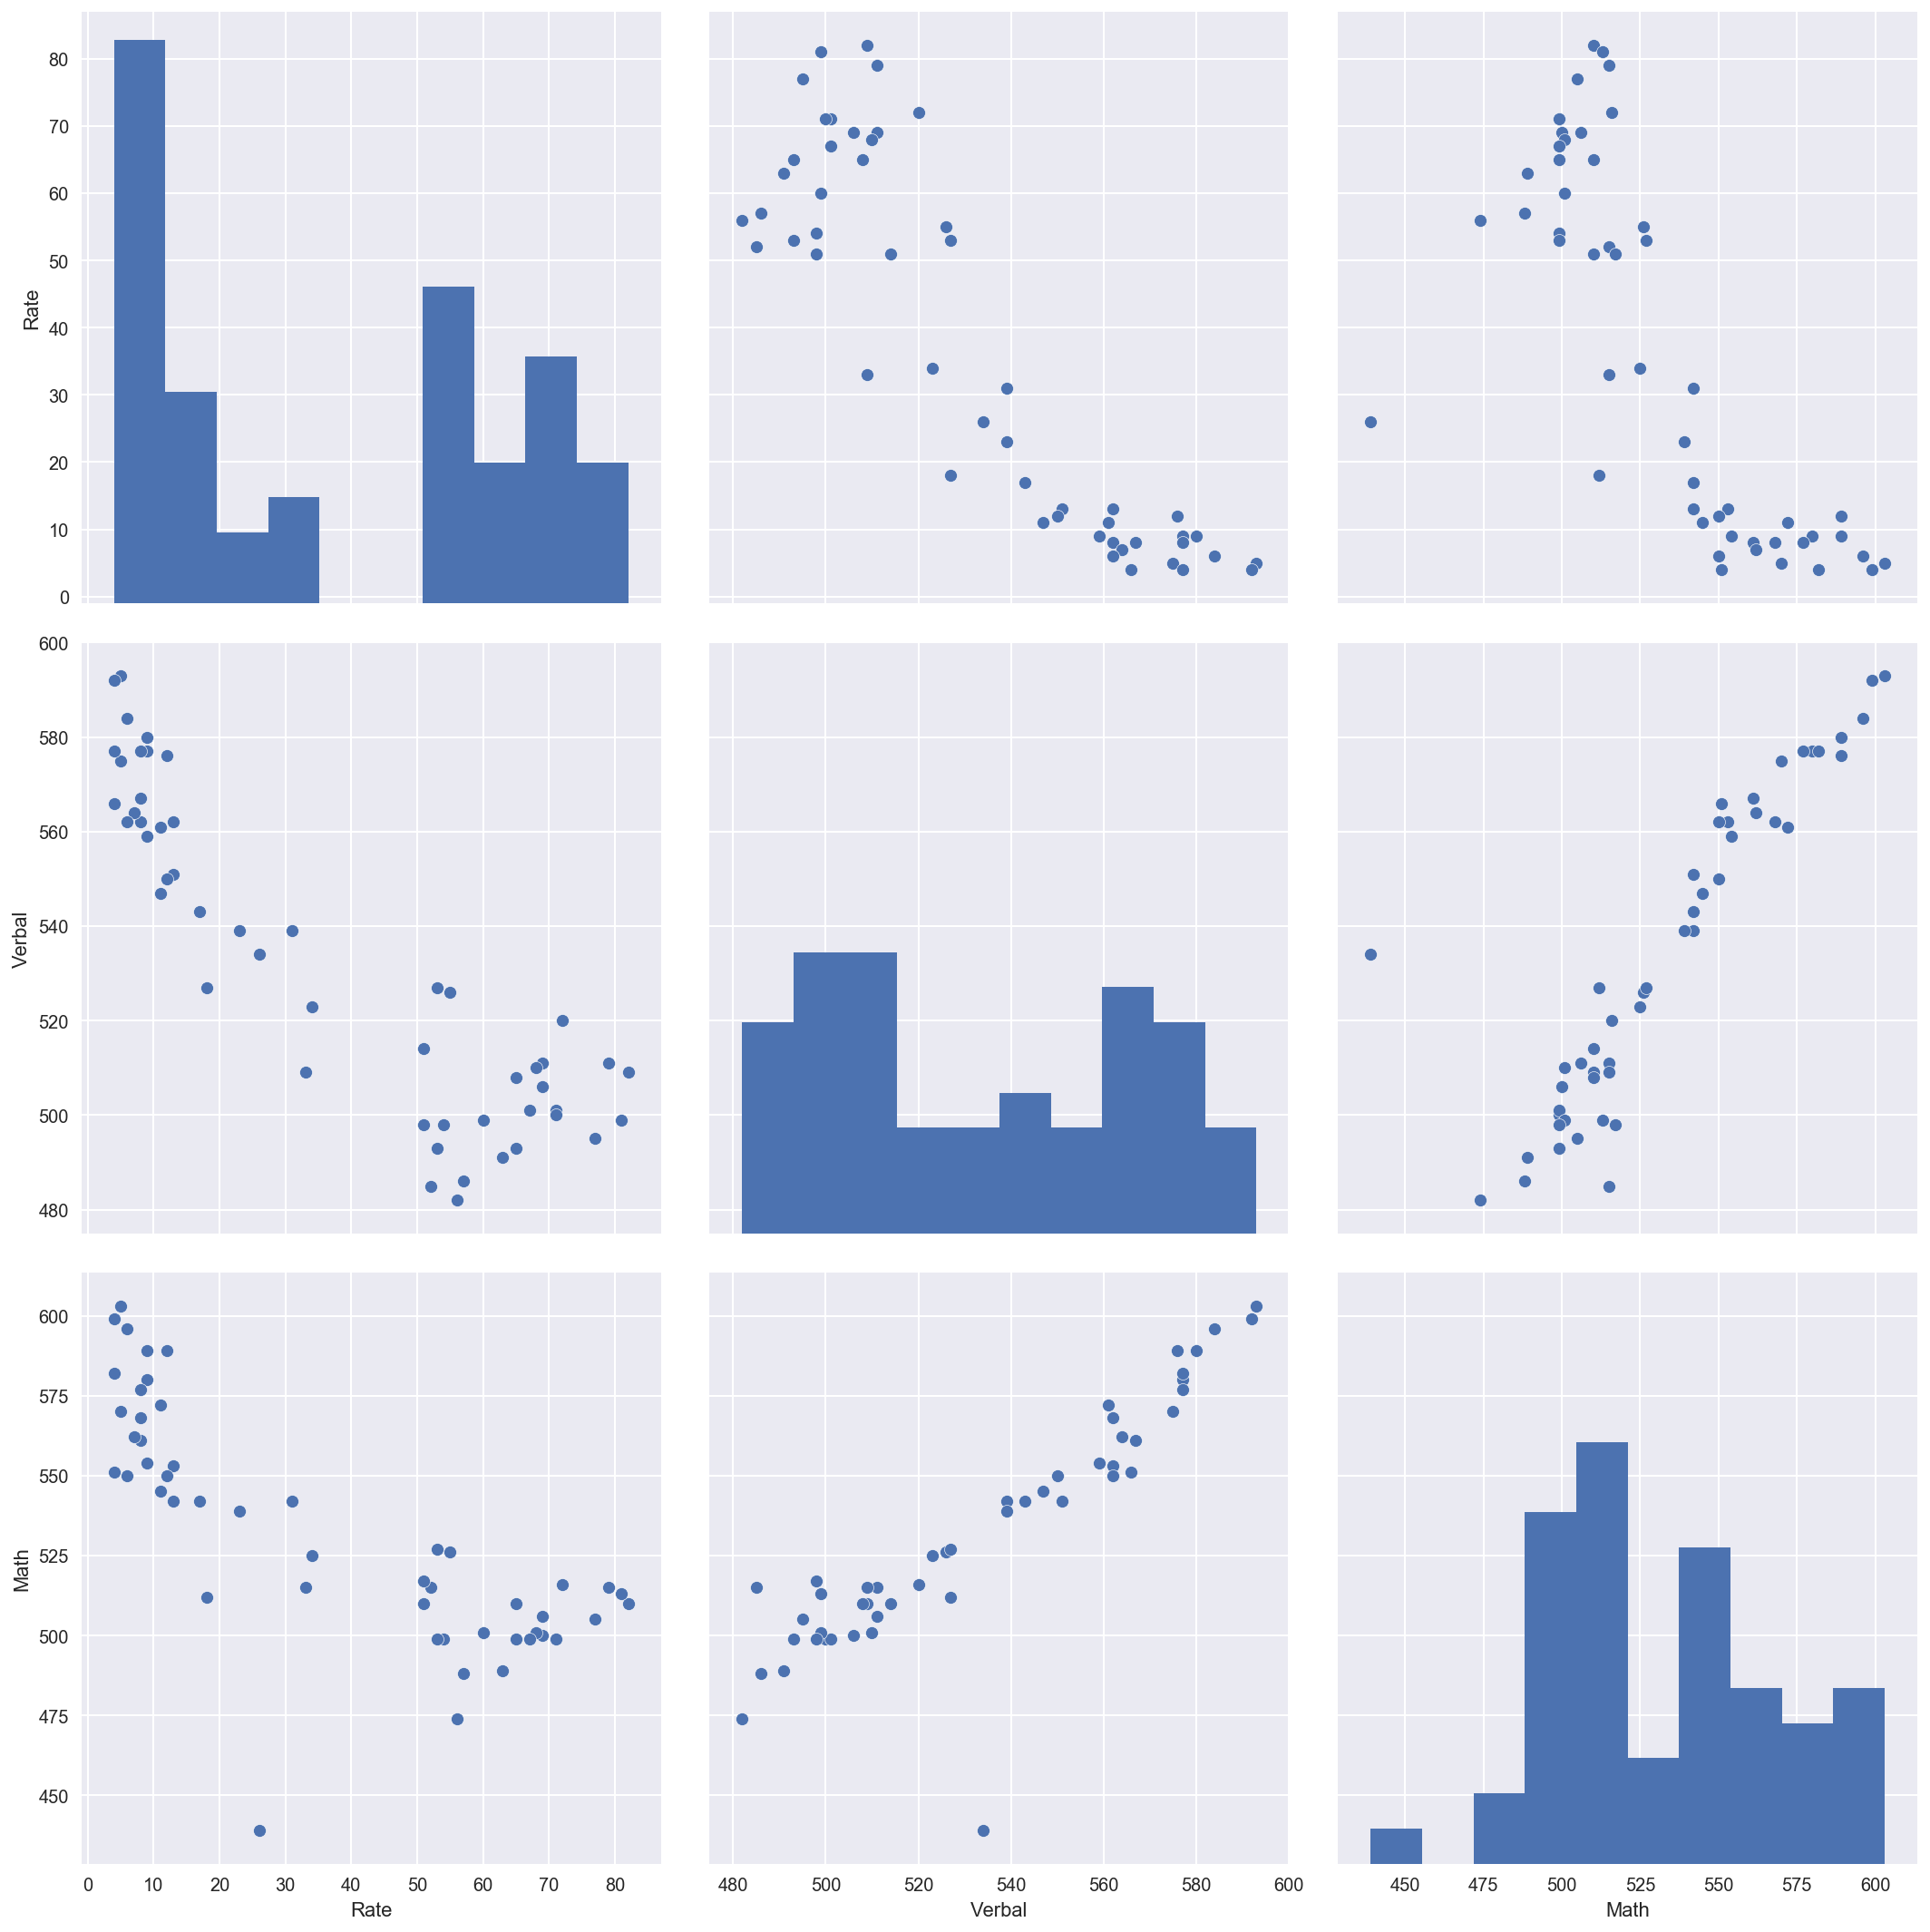

In [14]:
dict_sub_mvr = sat_df2.drop("State", axis=1)
sns.pairplot(dict_sub_mvr, size=5)

In [15]:
# Explain visualization of data above 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

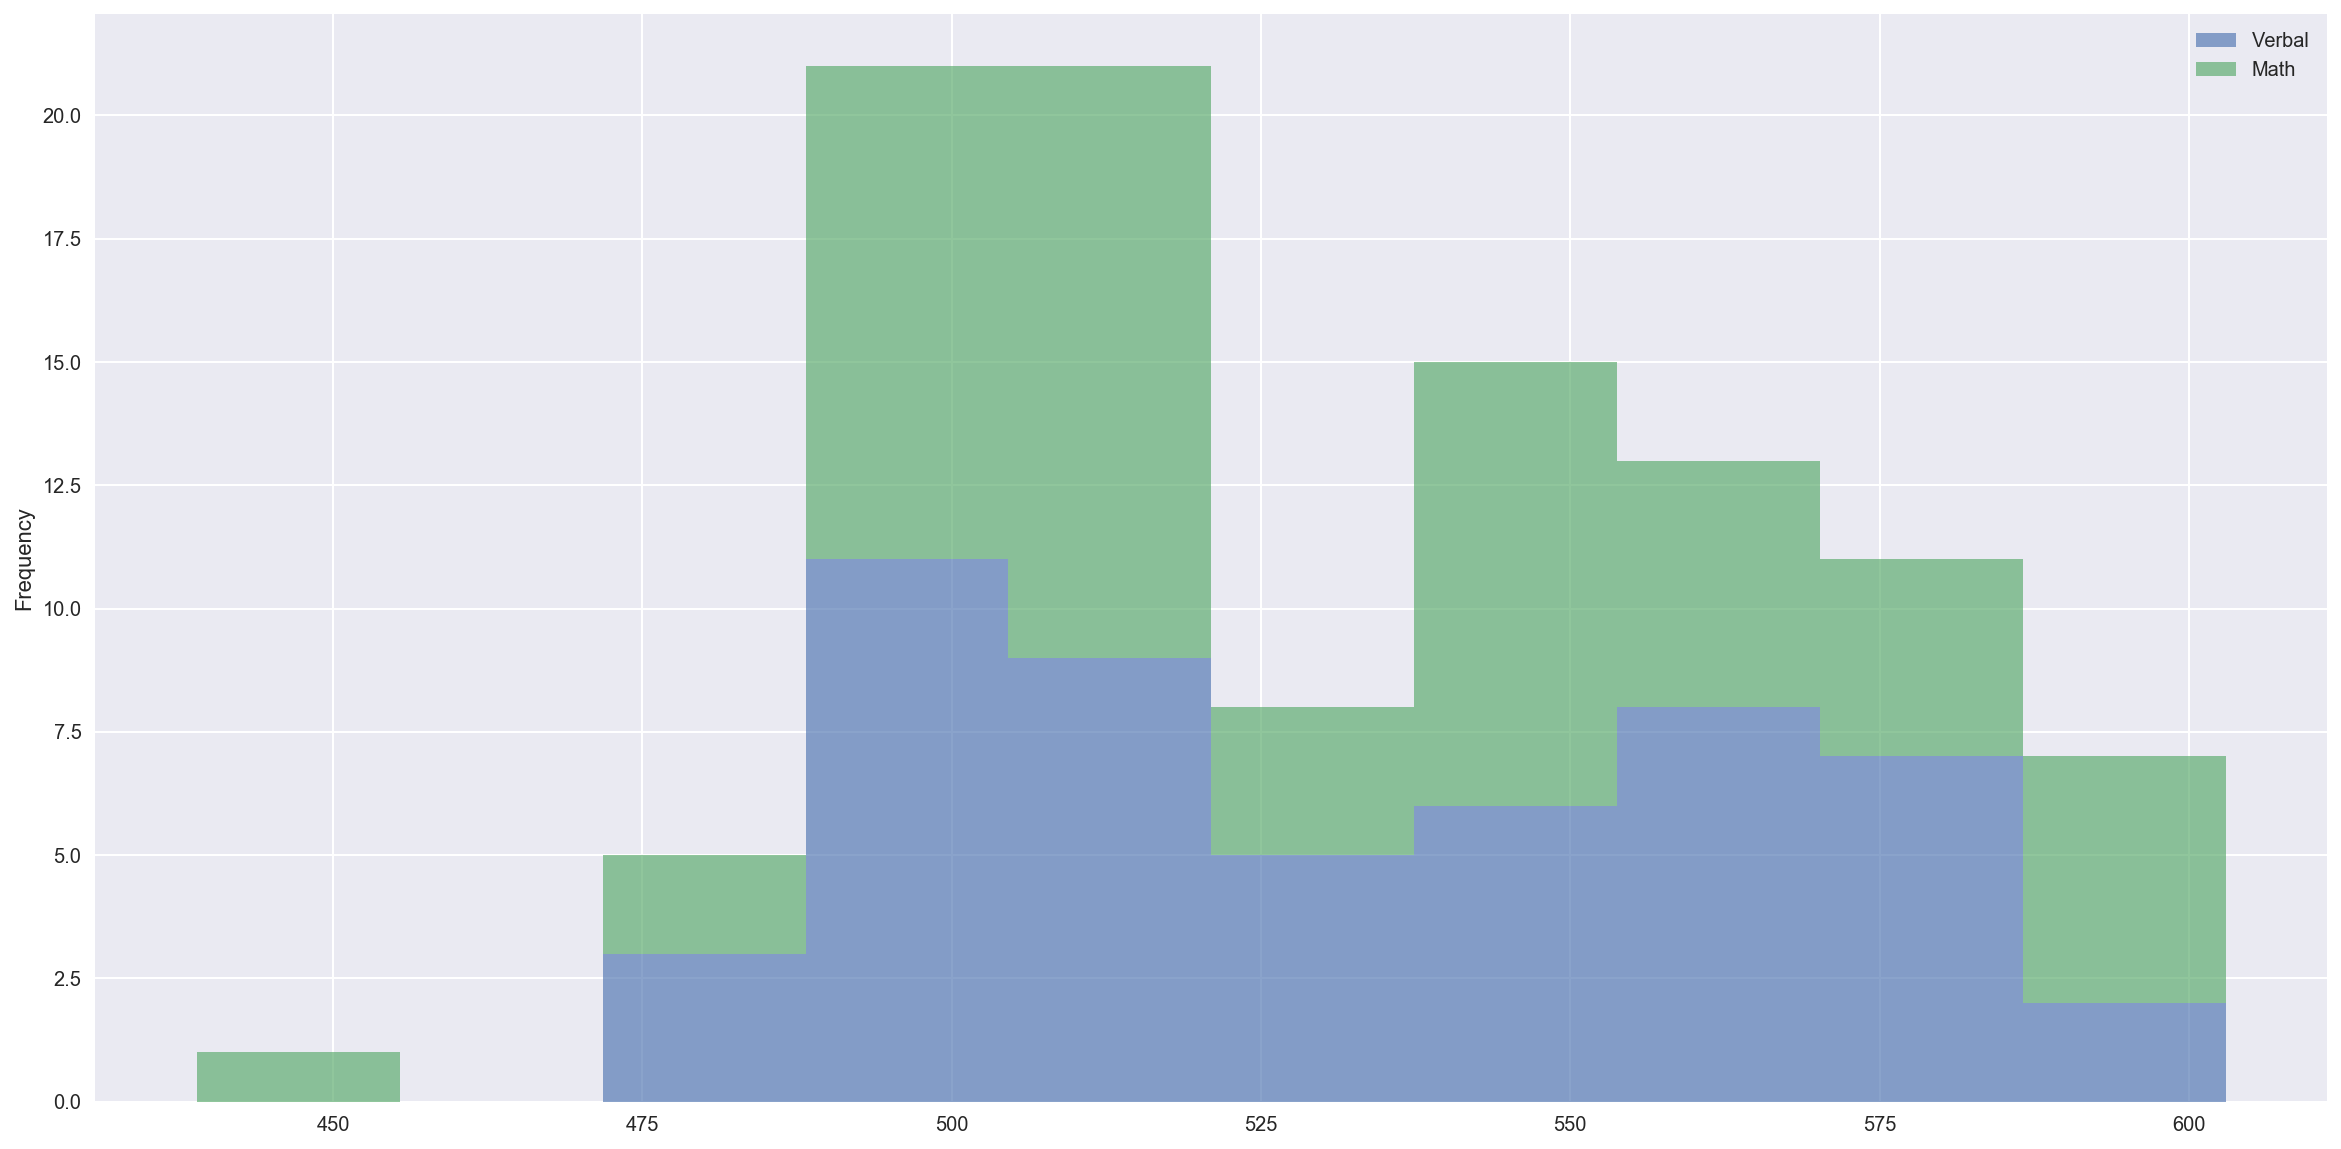

In [16]:
dict_sub_mv = dict_sub_mvr.drop("Rate", axis=1)
dict_sub_mv.plot.hist(alpha=0.65, stacked=True, figsize=(20,10))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

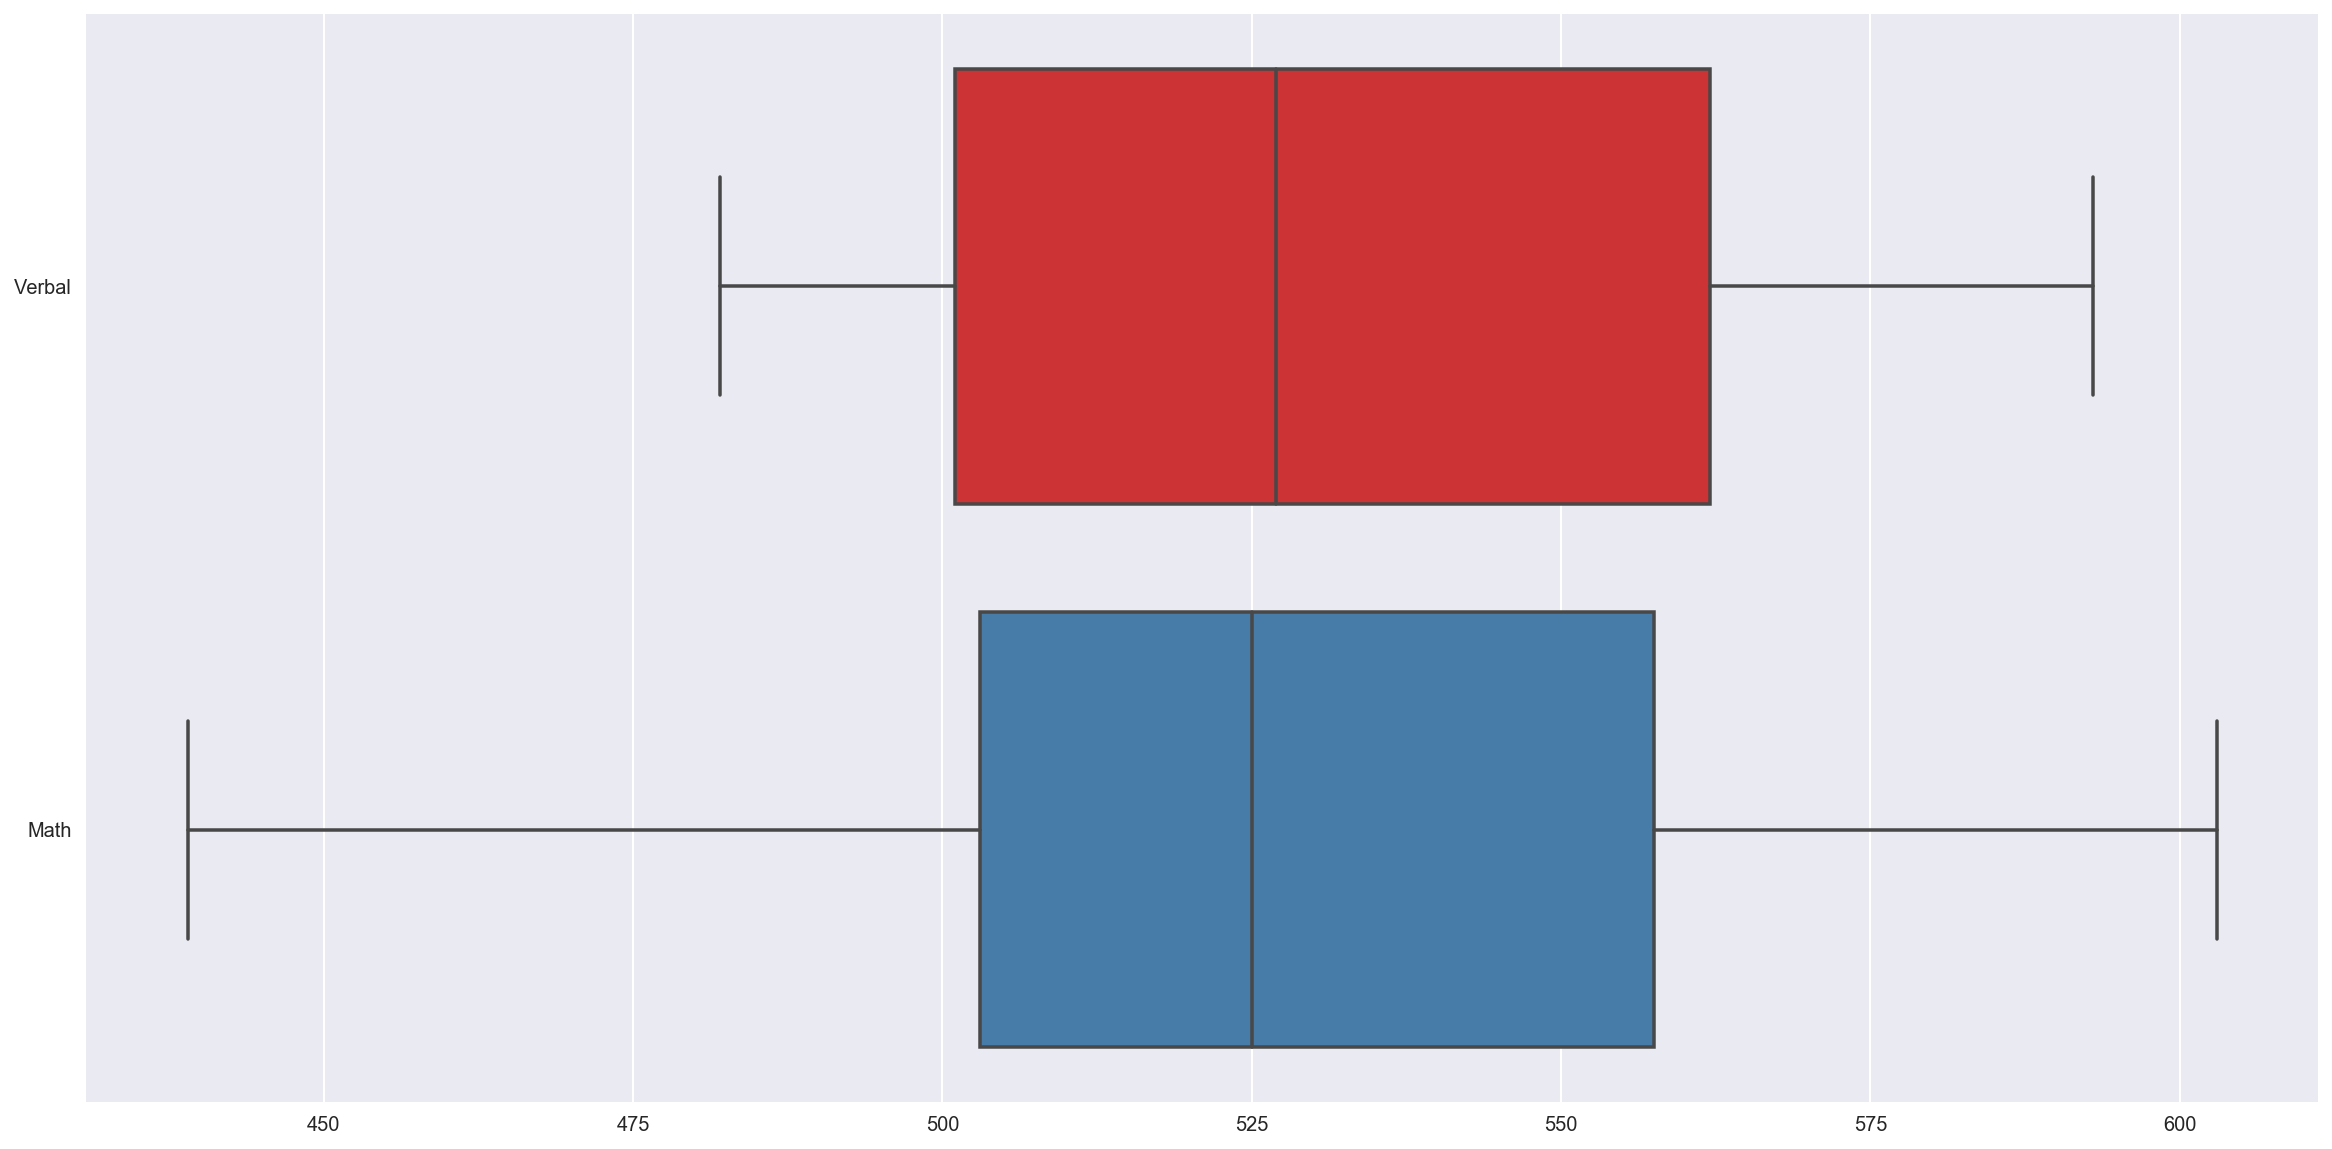

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=dict_sub_mv, orient="h", palette="Set1")

In [18]:
# It's possible to plot the Math and Verbal scores on the same figure because they use the same scale. 
# With Rate, the scale is not compatible as different things are being measured. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [19]:
dict_sub_norm = dict_sub_mv * 100 / (800)
dict_sub_norm["Rate"] = dict_sub_mvr["Rate"]

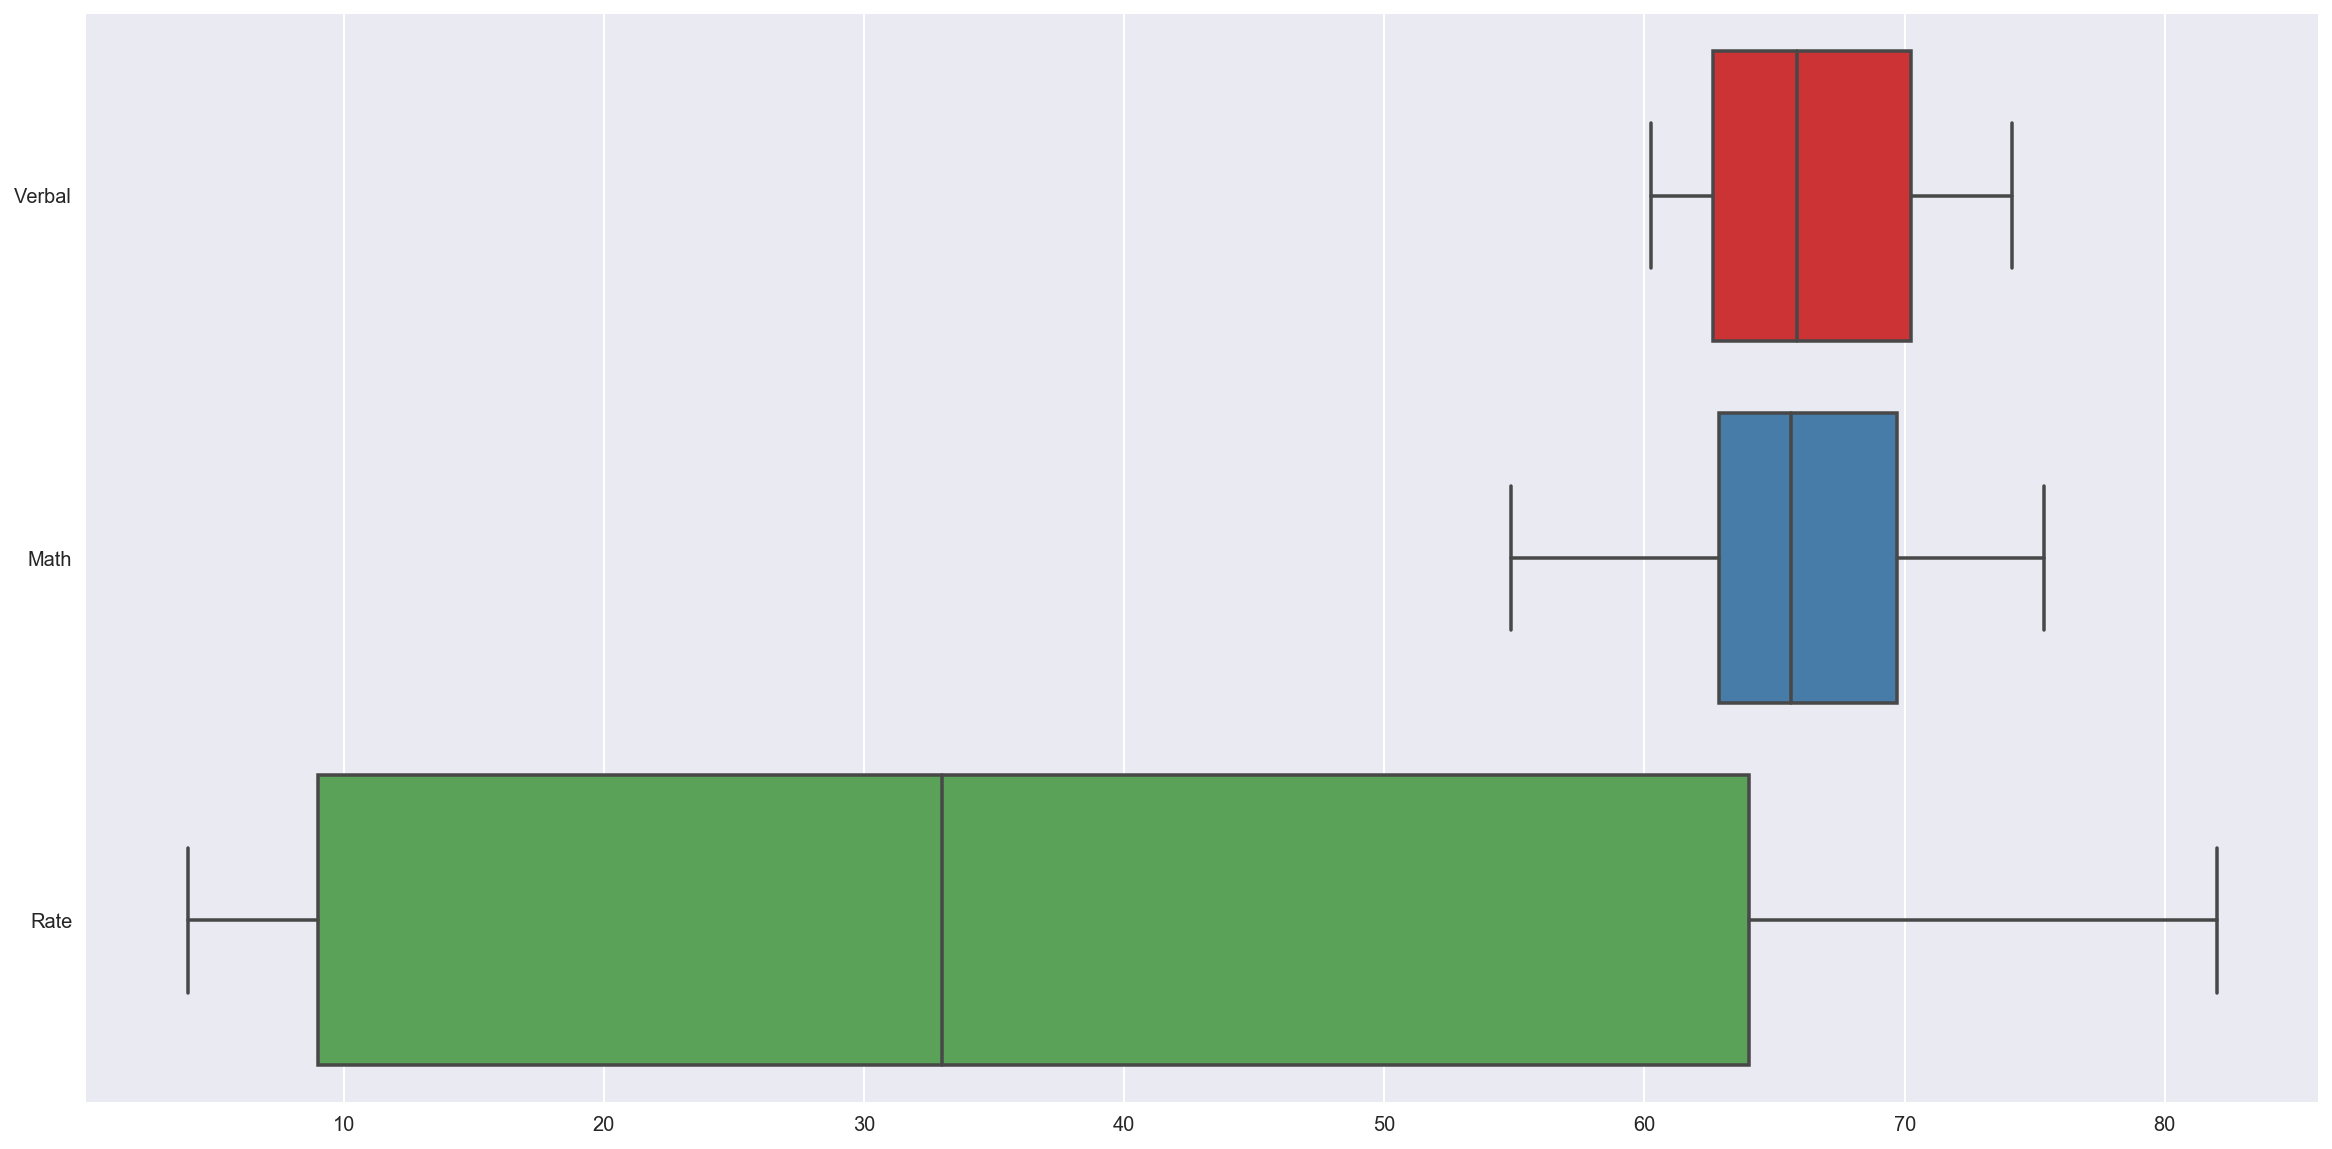

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=dict_sub_norm, orient="h", palette="Set1")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [21]:
#verbal = sat_df.loc[:, "Verbal"].tolist()
#for a in range(len(verbal)) :
#    if type(verbal[a]) == str :
#        verbal[a]  = int(verbal[a])
verbal = sat_df2.loc[:, "Verbal"].tolist()
verbal_mean = np.mean(verbal)

count = 0
state_list = []
for a in range(len(sat_df2)) :
    if sat_df2.iloc[a, 3] > verbal_mean :
        count += 1
        state_list.append(sat_df2.iloc[a, 0])
state_list.sort()
print "There are", count, "states above the mean Verbal scores of", verbal_mean
print "These states are", state_list

There are 23 states above the mean Verbal scores of 532.529411765
These states are ['AL', 'AR', 'CO', 'IA', 'ID', 'IL', 'KS', 'KY', 'LA', 'MI', 'MN', 'MO', 'MS', 'MT', 'ND', 'NE', 'NM', 'OK', 'SD', 'TN', 'UT', 'WI', 'WY']


In [22]:
# Using masks
verbal = sat_df2.loc[:, "Verbal"].tolist()
verbal_mean = np.mean(verbal)

sat_df2[sat_df2.Verbal > verbal_mean]

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [23]:
verbal_median = np.median(verbal)

count2 = 0
state_list_median = []

for a in range(len(sat_df2)) :
    if sat_df2.iloc[a, 3] > verbal_median :
        count2+= 1
        state_list_median.append(sat_df2.iloc[a, 0])

state_list_median.sort()
print "There are", count2, "states above the median Verbal scores of", verbal_median
print "These states are", state_list_median

There are 23 states above the median Verbal scores of 527.0
These states are ['AL', 'AR', 'CO', 'IA', 'ID', 'IL', 'KS', 'KY', 'LA', 'MI', 'MN', 'MO', 'MS', 'MT', 'ND', 'NE', 'NM', 'OK', 'SD', 'TN', 'UT', 'WI', 'WY']


In [24]:
verbal_median = np.median(verbal)

sat_df2[sat_df2.Verbal > verbal_median]

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [25]:
math = sat_df2.loc[:, "Math"].tolist()
#for a in range(len(math)) :
#    if type(math[a]) == str :
#        math[a]  = int(math[a])

np_math = np.array(math)
np_verbal = np.array(verbal)
vm_delta = np_verbal - np_math

sat_df2["Verbal-Math"] = vm_delta
sat_df2

State  Rate  Verbal  Math  Verbal-Math
0     CT    82     509   510           -1
1     NJ    81     499   513          -14
2     MA    79     511   515           -4
3     NY    77     495   505          -10
4     NH    72     520   516            4
5     RI    71     501   499            2
6     PA    71     500   499            1
7     VT    69     511   506            5
8     ME    69     506   500            6
9     VA    68     510   501            9
10    DE    67     501   499            2
11    MD    65     508   510           -2
12    NC    65     493   499           -6
13    GA    63     491   489            2
14    IN    60     499   501           -2
15    SC    57     486   488           -2
16    DC    56     482   474            8
17    OR    55     526   526            0
18    FL    54     498   499           -1
19    WA    53     527   527            0
20    TX    53     493   499           -6
21    HI    52     485   515          -30
22    AK    51     514   510            4
23    CA    51     498   517          -19
24    AZ    34     523   525           -2
25    NV    33     509   515           -6
26    CO    31     539   542           -3
27    OH    26     534   439           95
28    MT    23     539   539            0
29    WV    18     527   512           15
30    ID    17     543   542            1
31    TN    13     562   553            9
32    NM    13     551   542            9
33    IL    12     576   589          -13
34    KY    12     550   550            0
35    WY    11     547   545            2
36    MI    11     561   572          -11
37    MN     9     580   589           -9
38    KS     9     577   580           -3
39    AL     9     559   554            5
40    NE     8     562   568           -6
41    OK     8     567   561            6
42    MO     8     577   577            0
43    LA     7     564   562            2
44    WI     6     584   596          -12
45    AR     6     562   550           12
46    UT     5     575   570            5
47    IA     5     593   603          -10
48    SD     4     577   582           -5
49    ND     4     592   599           -7
50    MS     4     566   551           15

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [26]:
sat_top10_delta = sat_df2.sort_values("Verbal-Math", axis=0, ascending=False)
sat_top10_delta.reset_index(inplace=True, drop=True)
sat_top10_delta = sat_top10_delta.loc[:9,:]
sat_top10_delta

State  Rate  Verbal  Math  Verbal-Math
0    OH    26     534   439           95
1    MS     4     566   551           15
2    WV    18     527   512           15
3    AR     6     562   550           12
4    TN    13     562   553            9
5    VA    68     510   501            9
6    NM    13     551   542            9
7    DC    56     482   474            8
8    ME    69     506   500            6
9    OK     8     567   561            6

In [27]:
sat_top10_math_delta = sat_df2.sort_values("Verbal-Math", axis=0)
sat_top10_math_delta.reset_index(inplace=True, drop=True)
sat_top10_math_delta = sat_top10_math_delta.loc[:9,:]
sat_top10_math_delta

State  Rate  Verbal  Math  Verbal-Math
0    HI    52     485   515          -30
1    CA    51     498   517          -19
2    NJ    81     499   513          -14
3    IL    12     576   589          -13
4    WI     6     584   596          -12
5    MI    11     561   572          -11
6    NY    77     495   505          -10
7    IA     5     593   603          -10
8    MN     9     580   589           -9
9    ND     4     592   599           -7

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [28]:
dict_sub_mvr.corr()

Rate    Verbal      Math
Rate    1.000000 -0.888121 -0.773419
Verbal -0.888121  1.000000  0.899909
Math   -0.773419  0.899909  1.000000

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [29]:
dict_sub_mvr.describe()

Rate      Verbal        Math
count  51.000000   51.000000   51.000000
mean   37.000000  532.529412  531.843137
std    27.550681   33.360667   36.287393
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  503.000000
50%    33.000000  527.000000  525.000000
75%    64.000000  562.000000  557.500000
max    82.000000  593.000000  603.000000

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [30]:
dict_sub_mvr.cov()

Rate       Verbal         Math
Rate    759.04  -816.280000  -773.220000
Verbal -816.28  1112.934118  1089.404706
Math   -773.22  1089.404706  1316.774902

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [31]:
path2 = "/Users/GuangYi/Documents/GitHub/project2/drug_use_by_age.csv"
drugs = pd.read_csv(path2)

In [32]:
drugs.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

In [33]:
drugs.shape

(17, 28)

In [34]:
# Because dataset is so small, instead of deleting data, use the median of the column to replace the NaN value

row_count = drugs.shape[0] 
column_count = drugs.shape[1] 

for a in range(column_count) :
    
    for b in range(row_count) :
        if type(drugs.iloc[b,a]) is str :
            try :
                drugs.replace(to_replace=drugs.iloc[b,a], value=float(drugs.iloc[b, a]), inplace=True)
            except:    
                drugs.iloc[b,a] = drugs.iloc[b,a]
            
        
        if drugs.iloc[b,a] == '-' :
            drugs.replace(to_replace=drugs.iloc[b,a], value= float(0.), inplace=True)
            

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [35]:
drugs.describe()

n  alcohol-use  alcohol-frequency  marijuana-use  \
count    17.000000    17.000000          17.000000      17.000000   
mean   3251.058824    55.429412          33.352941      18.923529   
std    1297.890426    26.878866          21.318833      11.959752   
min    2223.000000     3.900000           3.000000       1.100000   
25%    2469.000000    40.100000          10.000000       8.700000   
50%    2798.000000    64.600000          48.000000      20.800000   
75%    3058.000000    77.500000          52.000000      28.400000   
max    7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
count            17.000000    17.000000          17.000000  17.000000   
mean             42.941176     2.176471           7.411765   0.294118   
std              18.362566     1.816772           8.014119   0.235772   
min               4.000000     0.000000           0.000000   0.000000   
25%              30.000000     0.500000           5.000000   0.000000   
50%              52.000000     2.000000           5.000000   0.400000   
75%              52.000000     4.000000           7.000000   0.500000   
max              72.000000     4.900000          36.000000   0.600000   

       crack-frequency  heroin-use         ...          oxycontin-use  \
count        17.000000   17.000000         ...              17.000000   
mean         12.382353    0.352941         ...               0.935294   
std          17.361532    0.333762         ...               0.608216   
min           0.000000    0.000000         ...               0.000000   
25%           2.000000    0.100000         ...               0.400000   
50%           6.000000    0.200000         ...               1.100000   
75%          15.000000    0.600000         ...               1.400000   
max          62.000000    1.100000         ...               1.700000   

       oxycontin-frequency  tranquilizer-use  tranquilizer-frequency  \
count            17.000000         17.000000               17.000000   
mean             13.941176          2.805882               11.735294   
std              12.902134          1.753379               11.485205   
min               0.000000          0.200000                4.500000   
25%               5.000000          1.400000                6.000000   
50%              12.000000          3.500000               10.000000   
75%              17.500000          4.200000               11.000000   
max              46.000000          5.400000               52.000000   

       stimulant-use  stimulant-frequency   meth-use  meth-frequency  \
count      17.000000            17.000000  17.000000       17.000000   
mean        1.917647            31.147059   0.382353       31.735294   
std         1.407673            85.973790   0.262762       32.206423   
min         0.000000             2.000000   0.000000        0.000000   
25%         0.600000             7.000000   0.200000       10.500000   
50%         1.800000            10.000000   0.400000       24.000000   
75%         3.000000            12.000000   0.600000       46.000000   
max         4.100000           364.000000   0.900000      105.000000   

       sedative-use  sedative-frequency  
count     17.000000           17.000000  
mean       0.282353           19.382353  
std        0.138000           24.833527  
min        0.000000            3.000000  
25%        0.200000            6.500000  
50%        0.300000           10.000000  
75%        0.400000           17.500000  
max        0.500000          104.000000  

[8 rows x 27 columns]

In [36]:
columns_use = range(2, column_count, 2) #+ [1]
#columns_use.sort()
columns_frequency = range(3, column_count, 2) #+ [0]
#columns_frequency.sort()

drugs_use = pd.DataFrame(drugs.iloc[:, columns_use])
drugs_frequency = pd.DataFrame(drugs.iloc[:, columns_frequency])
age_column = np.array(drugs.iloc[:, 0])
n_column = pd.DataFrame(drugs.iloc[:, 1])

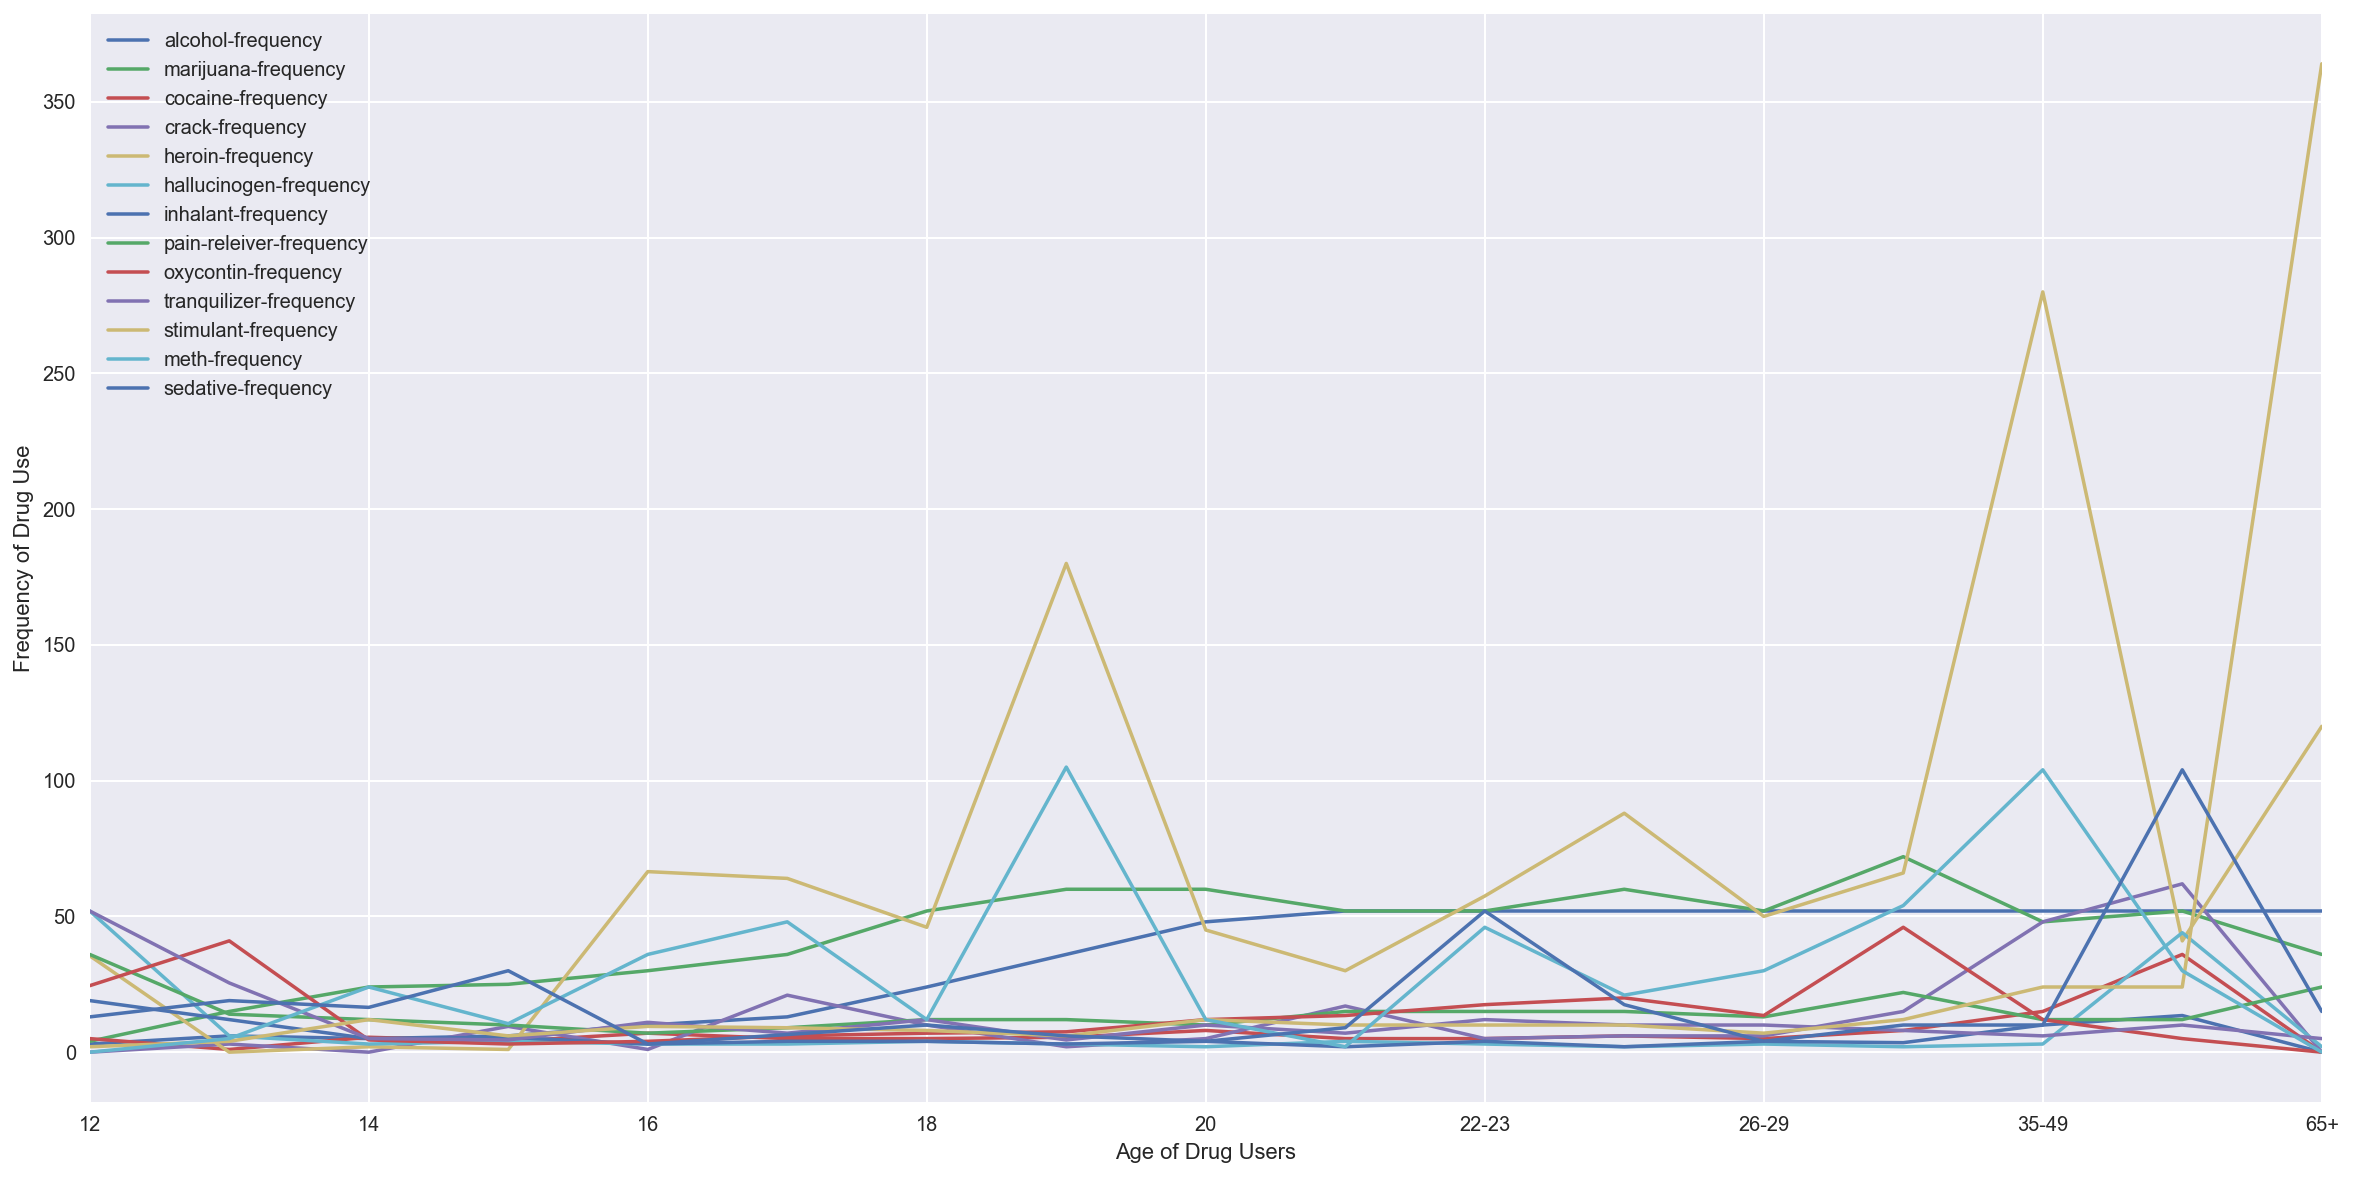

In [37]:
drugs_frequency.rename({0: "12", 1: "13", 2: "14", 3: "15", 4:"16", 5:"17", 6:"18", 7:"19", 8:"20", 9:"21", 10:"22-23", 11:"24-25", 
                  12:"26-29", 13:"30-34", 14: "35-49", 15:"50-64", 16:"65+"}, inplace=True)
ax = drugs_frequency.plot(figsize=(20,10))
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Frequency of Drug Use")

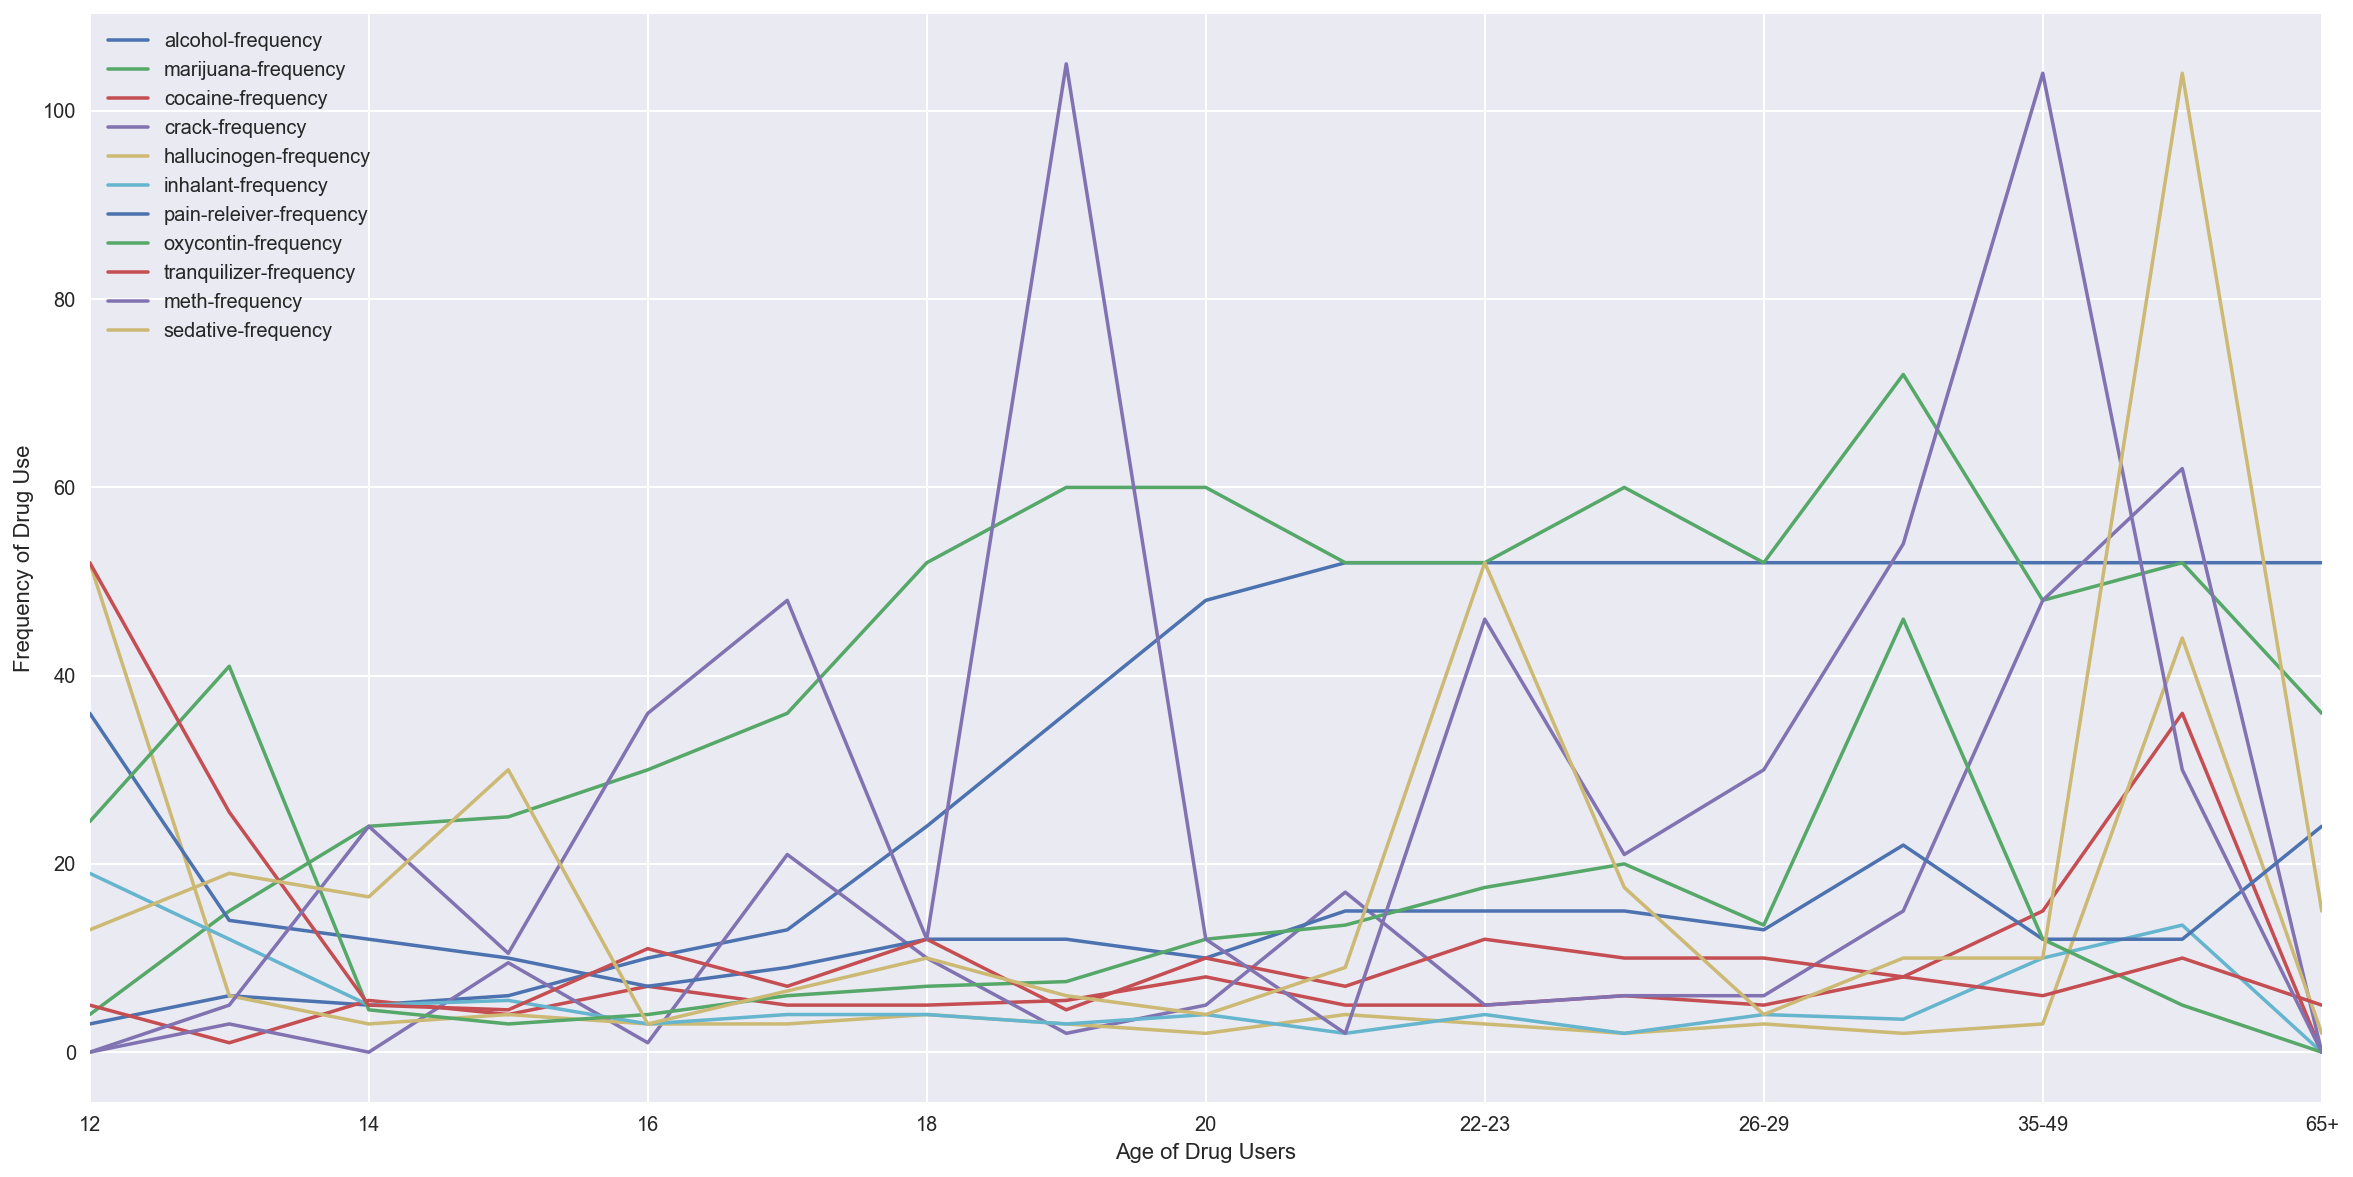

In [38]:
ax = drugs_frequency.drop(["heroin-frequency", "stimulant-frequency"], axis=1).plot(figsize=(20,10))
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Frequency of Drug Use")

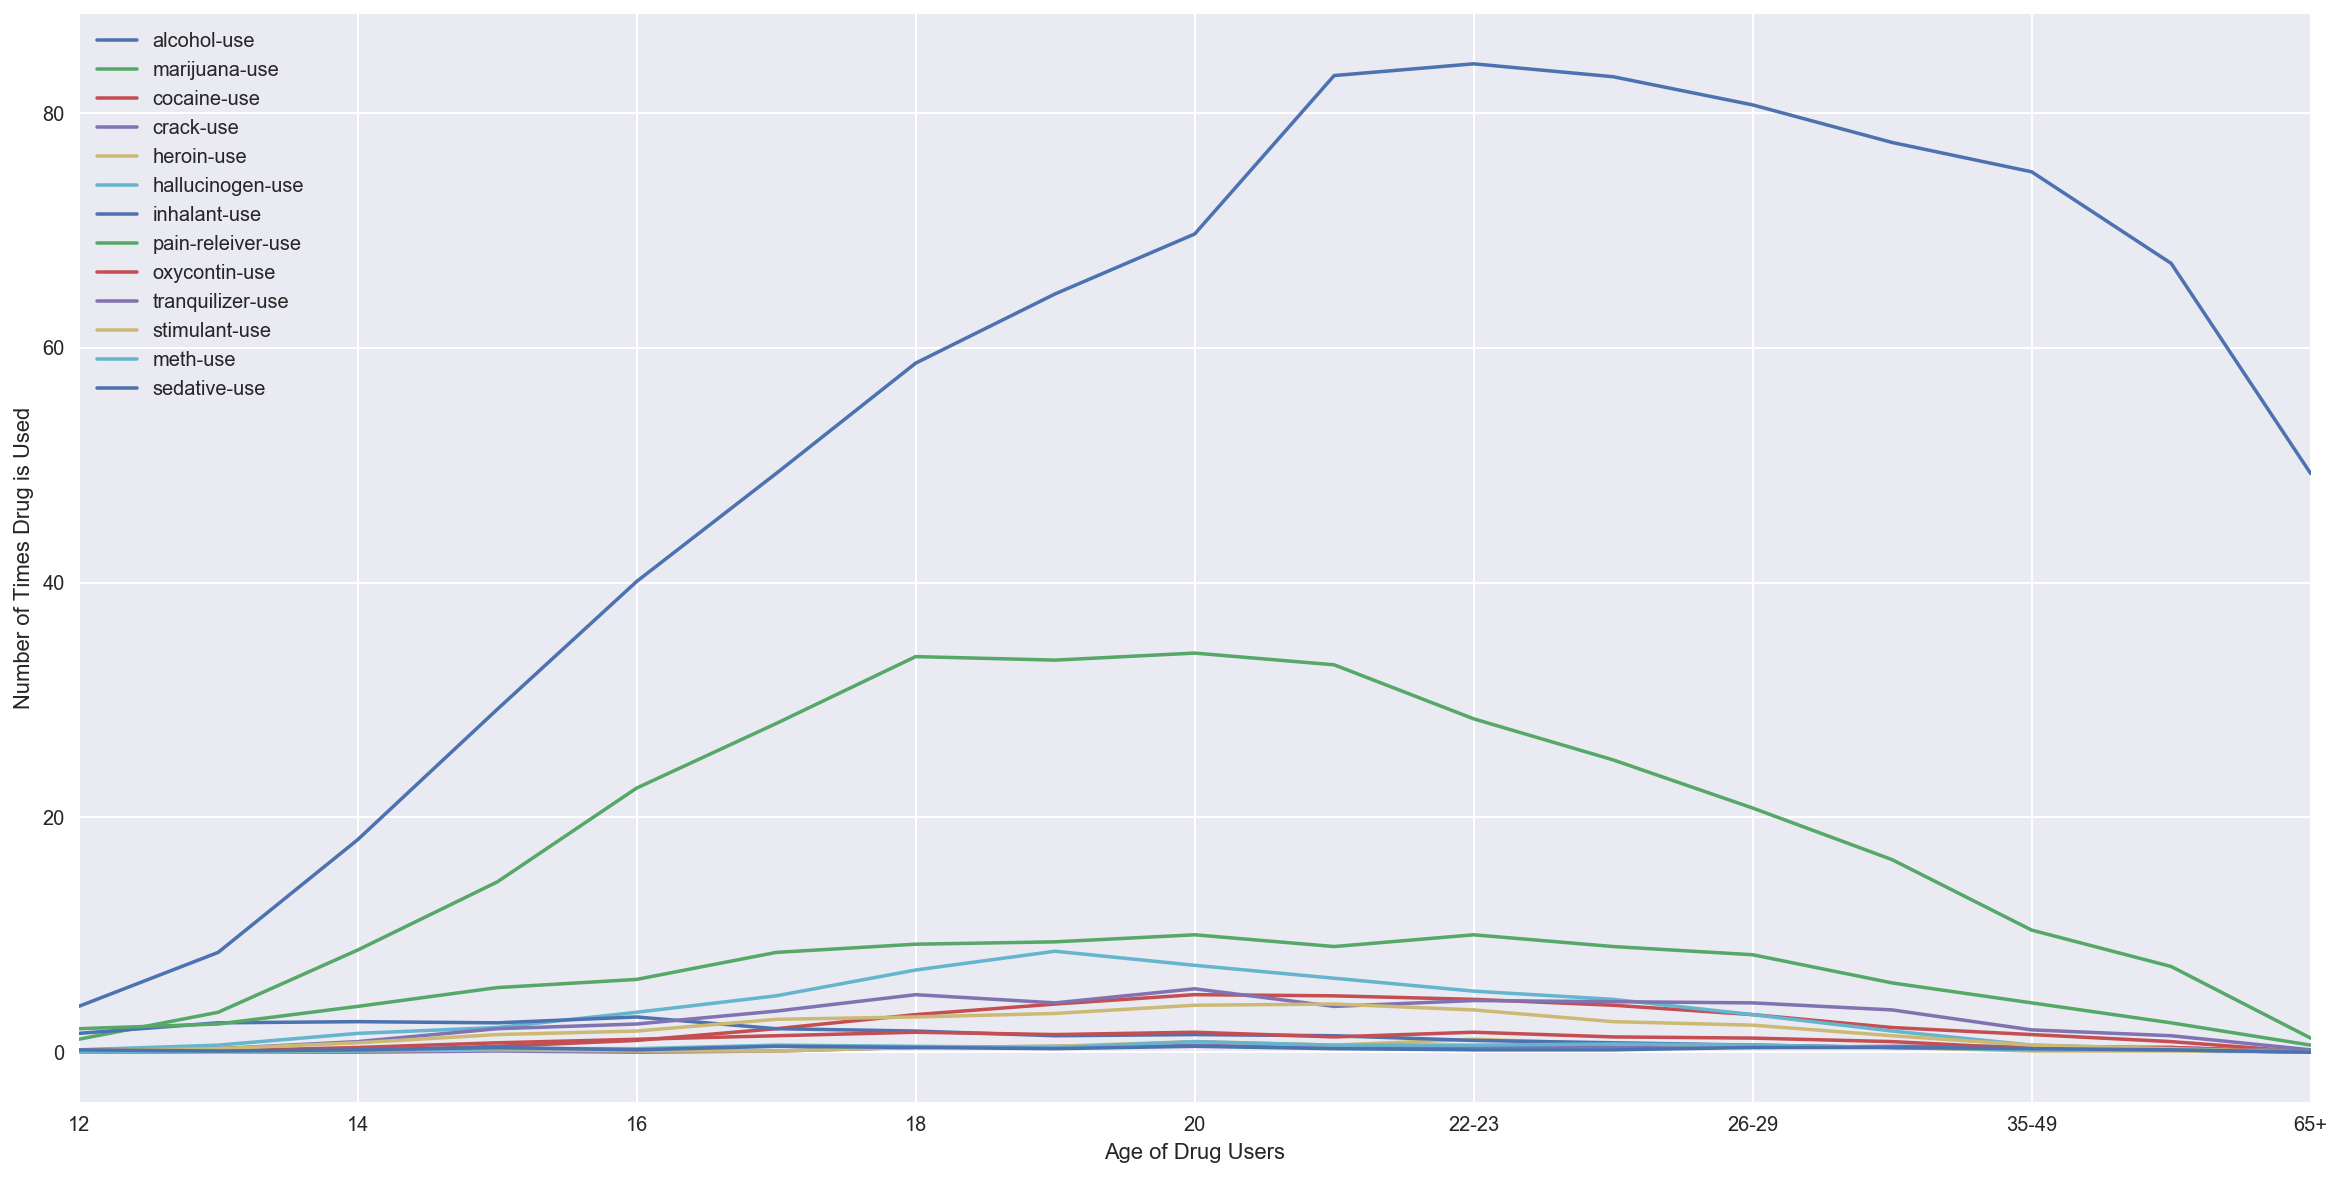

In [ ]:
drugs_use.rename({0: "12", 1: "13", 2: "14", 3: "15", 4:"16", 5:"17", 6:"18", 7:"19", 8:"20", 9:"21", 10:"22-23", 11:"24-25", 
                  12:"26-29", 13:"30-34", 14: "35-49", 15:"50-64", 16:"65+"}, inplace=True)
ax = drugs_use.plot(figsize=(20,10))
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Number of Times Drug is Used")

In [ ]:
ax = drugs_use.drop(["alcohol-use", "marijuana-use"], axis=1).plot(figsize=(20,10))
ax.set_xlabel("Age of Drug Users")
ax.set_ylabel("Number of Times Drug is Used")

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=drugs_use, orient="h", palette="Set2")

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=drugs_use.drop(["alcohol-use", "marijuana-use"], axis=1), orient="h", palette="Set2")

In [ ]:
drugs_use.corr("pearson")

In [ ]:
drugs_frequency.corr("pearson")

In [ ]:
drugs.drop(["n", "age"], axis=1).corr("pearson")

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=dict_sub_mv, orient="h", palette="Set1", whis=1)

In [ ]:
# By switching definition from standard IQR range of 1.5 to 1, making it slightly stricter, we lose one data point in the Math set.
# What happens when we remove Ohio from both sets?

In [ ]:
dict_clean = sat_df2.drop(["Rate", "Verbal-Math"], axis=1)
dict_clean.sort_values("Math", axis=0, inplace=True)
dict_clean.reset_index(inplace=True, drop=True)

In [ ]:
dict_clean.iloc[0,:]

In [ ]:
dict_clean.drop(dict_clean.index[0], inplace=True)

In [ ]:
dict_clean.head()

In [ ]:
math = sat_df2.loc[:, "Math"].tolist()
math_median = np.median(math)
sat_df2.describe()

print "The original medians are", verbal_median, "for verbal and", math_median, "for math."

In [ ]:
math2 = dict_clean.loc[:, "Math"].tolist()
math_median2 = np.median(math2)
english2 = dict_clean.loc[:, "Verbal"].tolist()
verbal_median2 = np.median(english2)

print "The cleaned medians are", verbal_median2, "for verbal and", math_median2, "for math."

In [ ]:
print dict_sub_mv.describe()
print 
print dict_clean.describe()

In [ ]:
# Explain what happened to all the numbers here.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [ ]:
mv_pearson = np.corrcoef(dict_clean["Verbal"], dict_clean["Math"])[0, 1]

# Spearman does not assume normal distribution
mv_spearman = stats.spearmanr(dict_clean["Verbal"], dict_clean["Math"])

print "Spearman's r is", mv_spearman
print "Pearson's r is", mv_pearson

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [ ]:
rate = np.array(sat_df2["Rate"])
#rate_percentile = np.percentile(rate, 82, axis=0)
#rate_percentile = rate / 82.
#sat_df2["Rate Percentile"] = rate_percentile

#sat_df2

rate_percentile = []

for a in rate :
    b = round(stats.percentileofscore(rate, a), 2)
    rate_percentile.append(b)
    
sat_df2["Rate Percentile"] = rate_percentile

In [ ]:
sat_df2.iloc[23]

In [ ]:
# How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.